# 2. Fase de creación del Dataset insumo

---

## Imports

In [1]:
from IPython.display import display, Image

---

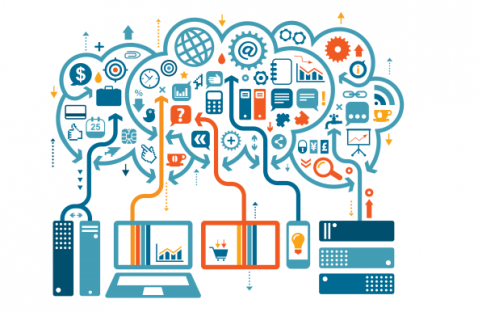

In [2]:
display(Image(filename='Resources/dataset.png'))

---

En esta fase se deberán realizar las siguientes **actividades**: 

1. 	Se debe implementar una serie de algoritmos que permitan automatizar el proceso de traslado de pcaps a csv’s
2. 	Se debe implementar un algoritmo que permita generar un Dataset basado en Netflows
3. 	Se debe implementar un algoritmo que permita generar un Dataset basado en ventanas de tiempo
4. 	Realizar una comparación entre ambos Datasets y escoger el mejor entre ellos


En esta fase, nuestros **entregables** son:

1. Conjunto de algoritmos que permitan la automatización del proceso de traslado de pcaps a cvs’s
2. Algoritmo generador de Dataset basado en Netflows
3. Algoritmo generador de Dataset basado en ventanas de tiempo
4. Comparación entre ambos Datasets
5. Dataset en formato .CSV


---

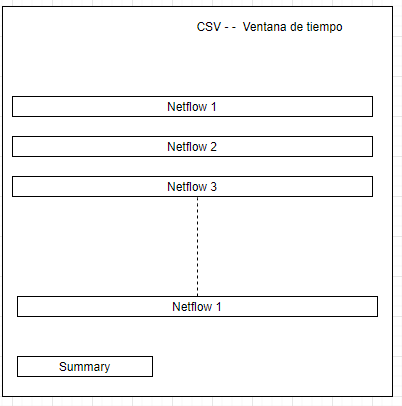

In [3]:
display(Image(filename='Resources/estructura.PNG'))

---

---

## Entregables 

###  Conjunto de algoritmos que permitan la automatización de traslado de pcaps a csv's

1. **El siguiente algoritmo permite convertir los archivos .pcaps en un conjunto de archivos nfpcaps (ventanas de tiempo)**

In [ ]:
import os

def generationOfNpcapsAuto(start,end, locationOfPcaps, locationsToSaveNfpcaps, netflowsLocation):

    for x in range(start, end):
        # Generation of dir that contains the nfpcaps generated with the name of the pcap
        os.chdir(netflowsLocation)
        os.system("mkdir " +  str(x) + "-nfpcaps")

        # Generation nfpcap
        cmd = "nfpcapd -r " + locationOfPcaps + str(x) + ".pcap -l " + locationsToSaveNfpcaps + str(x) + "-nfpcaps/"
        print(cmd)
        os.system(cmd)


def main():
    start = 64
    end = 81
    netflowsLocation = "/home/julioce/Documentos/PDG/PDG-2/Netflows/Malignos/"
    locationOfPcaps = "/home/julioce/Documentos/PDG/PDG-2/PCAPS/Pcaps\ Malignos/"
    locationsToSaveNfpcaps = "/home/julioce/Documentos/PDG/PDG-2/Netflows/Malignos/"
    generationOfNpcapsAuto(start,end,locationOfPcaps,locationsToSaveNfpcaps, netflowsLocation)


#main()

---

2. **El siguiente algoritmo permite renombrar los nfpcaps generados en el paso anterior**

In [ ]:
import os
from os import walk

def renameFilesAlg(mypath, start, end):

    for z in range(start, end):
        print("Vamos aqui:" + str(z))
        f = []
        for (dirpath, dirnames, filenames) in walk(mypath + str(z) + "-nfpcaps/"):
            f.extend(filenames)
            break

        y = 0
        for x in f:
            os.rename("/home/julioce/Documentos/PDG/PDG-2/Netflows/Malignos/"+str(z) +"-nfpcaps/" + x,
                          "/home/julioce/Documentos/PDG/PDG-2/Netflows/Malignos/" + str(z)+ "-nfpcaps/nfcapd." + str(y))
            y = y+1


def main(): 
    start = 1
    end = 81
    mypath = "/home/julioce/Documentos/PDG/PDG-2/Netflows/Malignos/"
    renameFilesAlg(mypath,start,end)
    
    
#main()

---

3. **El siguiente algoritmo permite trasladar los nfpcaps renombrados con el algoritmo anterior a csvs**

In [ ]:
import os
from os import walk


def generationOfcsvAuto(start,end, locationOfNfpcaps, locationToSave, myPath):

    for x in range(start, end):

        os.chdir(locationToSave)
        os.system("mkdir " + str(x) + "-csves")

        numberOfFiles = calculateNumberOfFiles(x, myPath)

        for y in range (0,numberOfFiles):
            # Generation of csv
            cmd = "nfdump -r " + locationOfNfpcaps + str(x) + "-nfpcaps/nfcapd." + str(y) + " -o csv > " + locationToSave + str(x) + "-csves/" + str(y)+".csv"
            print(cmd)
            os.system(cmd)


def calculateNumberOfFiles(numberOfCarpet, myPath):
        f = []
        for (dirpath, dirnames, filenames) in walk(myPath + str(numberOfCarpet) + "-nfpcaps/"):
            f.extend(filenames)
            break
        return len(f)


def main():
    start = 26
    end = 81
    myPath = "/home/julioce/Documentos/PDG/PDG-2/Netflows/Malignos/"
    locationOfNfpcaps = "/home/julioce/Documentos/PDG/PDG-2/Netflows/Malignos/"
    locationToSave = "/home/julioce/Documentos/PDG/PDG-2/Datasets/Maligns/"
    generationOfcsvAuto(start,end,locationOfNfpcaps, locationToSave, myPath)


#main()

---

---

### Generadores

#### Netflows

1. **El siguiente generador, permite unir todos los netflows de las ventanas de tiempo producidos por los algoritmos anteriores y pasarlos a un solo Dataset**

In [ ]:
from os import walk


def joiningAllCvs(path, start, end, dataName, nameSummary):
    flag = 0
    counter = 0
    fout = open(dataName, "a")
    summary = open(nameSummary,"a")
    for x in range (start, end):
        print("Va en : " + str(x))
        numberOfFiles = calculateNumberOfFiles(x, path) - 1
        for y in range (0,numberOfFiles):
            f = open(path + str(x) + "-csves/" + str(y) + ".csv")
            for line in f:
                if counter == 0:
                    if "ts" in line:
                        if flag == 0:
                            line = "References," + line
                            fout.write(line)
                            flag = 1
                    elif "Summary" in line:
                        counter = 2
                    else:
                        line = str(x) + "-csves/" + str(y) + ".csv," + line
                        fout.write(line)
                elif counter == 1 :
                    line = str(x) + "-csves/" + str(y) + ".csv," + line
                    summary.write(line)
                    counter = counter -1

                else :
                    counter = counter-1
            f.close()  # not really needed
    fout.close()
    summary.close()


def calculateNumberOfFiles(numberOfCarpet, myPath):
        f = []
        for (dirpath, dirnames, filenames) in walk(myPath + str(numberOfCarpet) + "-csves/"):
            f.extend(filenames)
            break
        return len(f)

def main():
    start =1
    end = 31
    dataName = "/home/botnets/Documentos/Botnets/PDG/PDG-2/Datasets/Consolidado_Maligno/1-31-allMaligns.csv"
    nameSummary = "/home/botnets/Documentos/Botnets/PDG/PDG-2/Datasets/Consolidado_Maligno/1-31-MalignSummaries.csv"
    path = "/home/botnets/Documentos/Botnets/PDG/PDG-2/Datasets/Malignos/"
    joiningAllCvs(path,start,end,dataName,nameSummary)
    
    
#main()

---

#### Time window

2. **El siguiente generador permite crear un Dataset basado en ventanas de tiempo**

In [ ]:
from os import walk
import operator
import numpy as np


def generator(start,end ,Type, dataname, path_csvs):
    #VARS
    reference = ""
    flag = 0
    counter = 0
    header = "Name,Netflows,First_Protocol,Second_Protocol,Third_Protocol,p1_d,p2_d,p3_d,duration,max_d,min_d,#packets,Avg_bps,Avg_pps,Avg_bpp,#Bytes,#sp,#dp,first_sp,second_sp,third_sp,first_dp,second_dp,third_dp,p1_ip,p2_ip,p3_ip,p1_ib,p2_ib,p3_ib,Type\n"
    fout = open(dataname, "a")

    for x in range(start, end):
        print("va en " + str(x))
        numberOfFiles = calculateNumberOfFiles(x, path_csvs) - 1
         for y in range(0, numberOfFiles):
            netflows = 0
            lduration = []
            protocols = {}
            packets = 0
            avg_bps = 0
            avg_pps = 0
            avg_bpp = 0
            bytes = 0
            sourcePorts = {}
             destinationPorts = {}
            lipkt = []
            libyt = []
            f = open(path_csvs + str(x) + "-csves/" + str(y) + ".csv")
            reference = str(x) + "-csves/" + str(y) + ".csv"
            for line in f:
            if counter == 0:
                if "ts" in line:
                    if flag == 0:
                            fout.write(header)
                            flag = 1
                    elif "Summary" in line:
                         counter = 2
                    else:
                        temp = line.split(",")
                        lduration.append(float(temp[2]))
                        lipkt.append(float(temp[11]))
                        libyt.append(float(temp[12]))
                        if temp[5] in sourcePorts:
                            sourcePorts[temp[5]] = sourcePorts[temp[5]] + 1
                        else:
                            sourcePorts[temp[5]] = 1
                        if temp[6] in destinationPorts:
                            destinationPorts[temp[6]] = destinationPorts[temp[6]] + 1
                        else:
                            destinationPorts[temp[6]] = 1
                        if temp[7] in protocols:
                            protocols[temp[7]] = protocols[temp[7]] + 1
                        else:
                            protocols[temp[7]] = 1

                elif counter == 1:
                    temp = line.split(",")
                    netflows = temp[0]
                    bytes = temp[1]
                    packets = temp[2]
                    avg_bps = temp[3]
                    avg_pps = temp[4]
                    avg_bpp = temp[5].replace("\n","")

                    sourcePorts = sorted(sourcePorts.items(), key=operator.itemgetter(1), reverse=True)
                    destinationPorts = sorted(destinationPorts.items(), key=operator.itemgetter(1), reverse=True)
                    protocols = sorted(protocols.items(), key=operator.itemgetter(1), reverse=True)

                    counter = counter -1

                else:
                     counter = counter - 1
            f.close()

            duration = np.array(lduration)
            ipkt = np.array(lipkt)  # 11
            ibyt = np.array(libyt)  # 12

            sum_d = str(np.sum(duration, axis=0))
            d_max = str(np.amax(duration))
            d_min = str(np.amin(duration))

            p1_d = str(np.percentile(duration,25))
            p2_d = str(np.percentile(duration,50))
            p3_d = str(np.percentile(duration,75))
            p1_ip = str(np.percentile(ipkt,25))
            p2_ip = str(np.percentile(ipkt,50))
            p3_ip = str(np.percentile(ipkt,75))
            p1_ib = str(np.percentile(ibyt,25))
            p2_ib = str(np.percentile(ibyt,50))
            p3_ib = str(np.percentile(ibyt,75))

            number_sp = str(len(sourcePorts))
            number_dp =  str(len(destinationPorts))

            first_protocol = protocols[0][0]
            second_protocol = ""
            third_protocol = ""
            lg = len(protocols)
                if lg > 1:
                     second_protocol = protocols[1][0]
            if lg > 2:
                     third_protocol = protocols[2][0]


            first_sp = sourcePorts[0][0]
            lg = len(sourcePorts)
            second_sp = ""
            third_sp = ""
            if lg > 1:
                 second_sp = sourcePorts[1][0]
            if lg > 2:
                third_sp= sourcePorts[2][0]

            first_dp = destinationPorts[0][0]
            lg = len(destinationPorts)
            second_dp = ""
            third_dp = ""
            if lg > 1:
                second_dp = destinationPorts[1][0]
            if lg > 2:
                third_dp = destinationPorts[2][0]

            liner = reference +","+ netflows +","+ first_protocol +","+ second_protocol +","+ third_protocol +","+ p1_d+ "," + p2_d + "," + p3_d +","+ sum_d +","+ d_max +","+ d_min +","+packets +","+ avg_bps +","+ avg_pps +","+ avg_bpp +","+bytes +","+ number_sp +","+ number_dp +","+ first_sp + "," + second_sp + "," + third_sp + "," + first_dp + "," + second_dp + "," + third_dp + "," + p1_ip +","+p2_ip +","+ p3_ip +","+ p1_ib +","+ p2_ib +","+ p3_ib + "," + Type + "\n"
             fout.write(liner)
    fout.close()


def calculateNumberOfFiles(numberOfCarpet, myPath):
        f = []
        for (dirpath, dirnames, filenames) in walk(myPath + str(numberOfCarpet) + "-csves/"):
            f.extend(filenames)
            break
        return len(f)

def main():
    start =32
    end = 81
    type = "Malign"
    dataName = "/home/julioce/Documentos/PDG/PDG-2/Datasets/MalignTimeWindows(32-80).csv"
    path_csvs = "/home/julioce/Documentos/PDG/PDG-2/Datasets/Maligns/"
    generator(start,end,type,dataName,path_csvs)
    
    
#main()

---

---

## Comparación entre ambos Datasets

---

La siguiente captura pertenece al **Dataset de Netflows** :

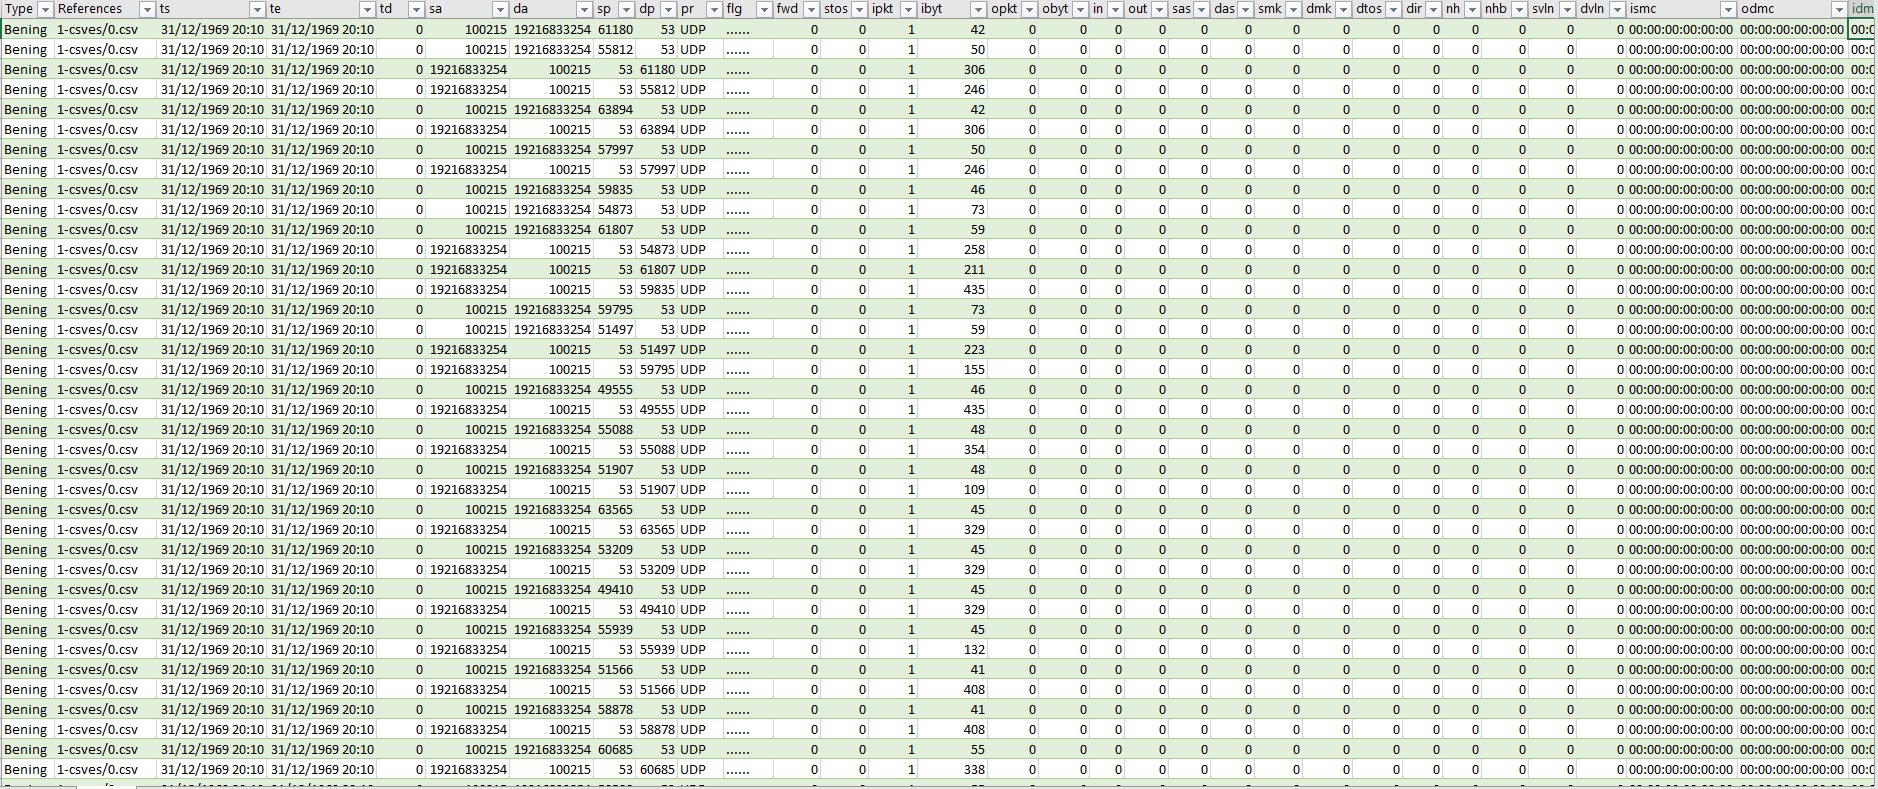

In [4]:
display(Image(filename='Resources/netflows.PNG'))

El anterior dataset esta dividido en 2 partes:
    1. Un dataset etiquetado con **netflows benignos** cuyo numero de filas (netflows) corresponde a **1 millon**
    2. Un dataset etiquetado con **netflows malignos** cuyo numero de filas (netflows) corresponde a **32 millones**

En este dataset podemos evidenciar lo siguiente:

1. Existe un numero considerable de variables cuyo valor por cada registro (netflow) es 0
2. Existen algunas variables cuyo uso ya no es bien visto, bien sea por incompatibilidad o esten deprecated

Por otro lado, el peso estimado de estos Datasets era aproximadamente **12 GB**, por ende en la fase siguiente se deberia trabajar con **muestras**

---

La siguiente captura pertenece al **Dataset de ventanas de tiempo**:

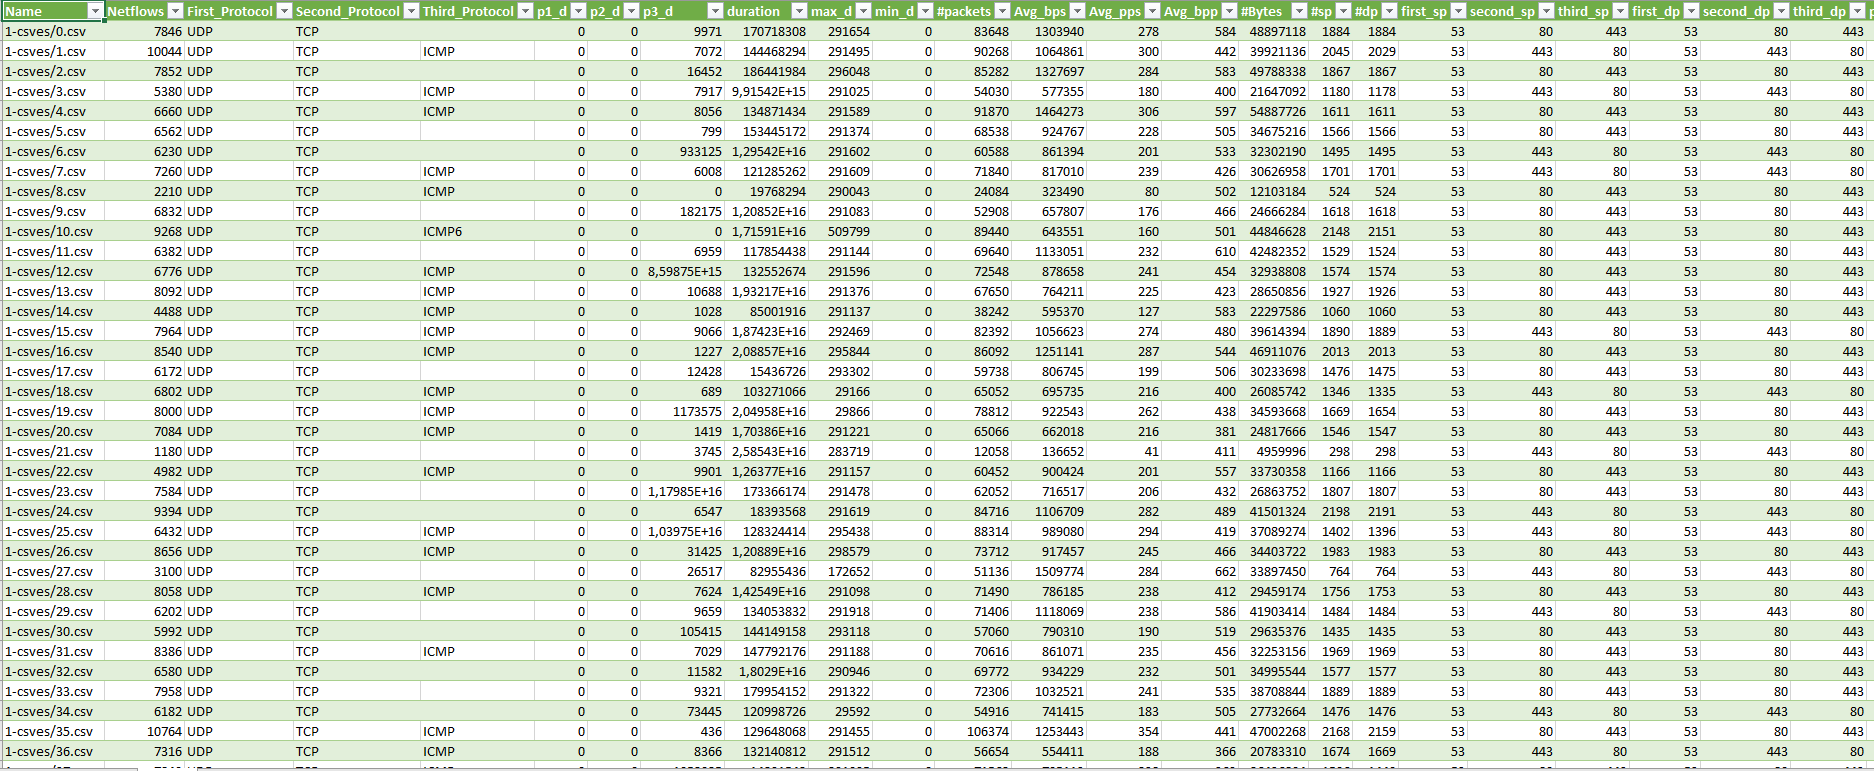

In [5]:
display(Image(filename='Resources/tw.PNG'))

Las variables que se encuentran presentes en este Dataset fueron construidas por nosotros mismos. Se escogieron algunas variables representativas del dataset anterior y se hizo un enfoque prolongado a travez de esas variables, por ejemplo:

1. La variable **duration** fue transformada en 6 variables. Lo anterior, con el fin de identificar la duración de     un posible DDoS en un espectro aun mayor 

El peso aproximado de este Dataset fue de **36,8 mb**

---

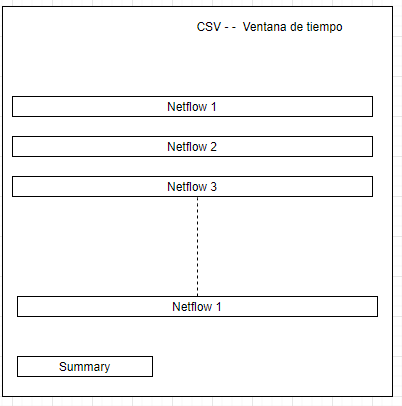

In [6]:
display(Image(filename='Resources/estructura.PNG'))

Realizamos la siguiente comparativa :

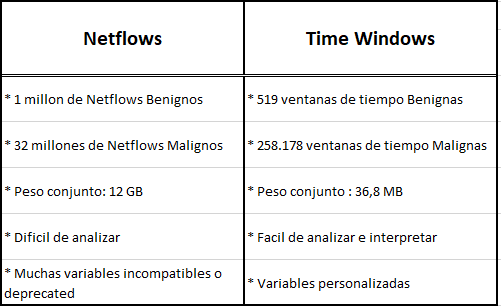

In [7]:
display(Image(filename='Resources/twvsnetflows.PNG'))

Entre ambos Datasets decidimos escoger el **basado en ventanas de tiempo**, debido a que si pensamos a largo plazo, el dataset de netflows debia ser estudiado a partir de muestras debido a su tamaño (12 GB). Ademas, uno de nuestros enfoques es crear un aplicativo web que analize en tiempo real muestras de trafico de red y uno de los principales problemas que se podrian evidenciar es el almacenamiento de estos archivos